In [ ]:
#parameters for deny list and url 
denyListURL = "denylist.csv"
notebookListURL ="notebooklist.csv"

In [1]:
# Parameters
denyListURL = "denylist.csv"


In [2]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#forbidden words function
def disallowedTermCheck(deniedTerms, line): #numpy array or terms and weights 
    terms_count = {term : 0 for term in deniedTerms}
    for term in deniedTerms:
                #loop through terms 
                if term in line:
                    #check term in line
                    terms_count[term] += 1
#                     print(terms_count) #to see this carried out line by line
    return terms_count


In [5]:
#url emails - extra functionality online datasets and csv checks
def regexChecker(line):
    import re 
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex,line) 
    line_check = True
    if not url:
        line_check = False
        
    #expand to take url / email and true
        
    return line_check

regexChecker('https://www.asda.ie')

True

In [6]:

#csv function ( to be implemented later)
#online dataset function (to be implemented later)

In [7]:

#main 

#notebook checker function 
# open file
# store list of notebooks 
# iterate through directory 
    #file x found and opened
    # iterate through line
            #iteration x 
            #url function
            #regex function
            #store results
    #document results of entire notebook
#document results of all notebooks

#display results in various formats 


def notebookChecker(denyListURL, notebookListURL):
    denyTerms = pd.read_csv('denylist.csv')
    deniedTerms = np.array(denyTerms)
    denyList = {}
    for terms in deniedTerms:
        denyList.update({terms[0]:terms[1]})
    # print (f"\n Here we check the terms and their corresponding weights {denyList} \n")    
    
    disallowedTerms = []
    for term in denyList.keys():
        disallowedTerms += [term]
    #print (f"\n here we assign the terms to be checked to a list {terms} \n")
    
    checkedNotebooks = {}
    
    notebookList = pd.read_csv('notebooklist.csv')
    uncheckedNotebooks = np.array(notebookList)
    print (f"\n Here we open and read the notebooks due to be open {uncheckedNotebooks} \n")
    

    #loop through files from list
    for uncheckedNotebook in uncheckedNotebooks:
        notebook = {}
        urlsFound = 0
        currentNotebook = open(str(f"notebooks/{uncheckedNotebook[0]}"), "r")
        # here we check line by line the the terms found which are added to a list 
        disallowedTermCount = {term : 0 for term in disallowedTerms}
        
        for line in currentNotebook:
            #loop trough line by line
            if regexChecker(line) == True:
                urlsFound += 1
            checkedLine = disallowedTermCheck(disallowedTerms, line)
            for term in checkedLine:
                if checkedLine[term] > 0:
                    disallowedTermCount[term] += 1
                    notebook.update({term: int(disallowedTermCount[term]) * int(denyList[term])}) 
                    checkedNotebooks.update({str(uncheckedNotebook): notebook})
        checkedNotebooks[str(uncheckedNotebook)]['urlsFound'] = urlsFound

    return checkedNotebooks 
    
    
checkNotebooks = notebookChecker(denyListURL, notebookListURL)
print(checkNotebooks)


 Here we open and read the notebooks due to be open [['sample.ipynb']
 ['sample2.ipynb']
 ['Lab03.ipynb']] 

{"['sample.ipynb']": {'security': 52, 'class': 9, 'people': 20, 'urlsFound': 1}, "['sample2.ipynb']": {'security': 52, 'class': 9, 'people': 20, 'urlsFound': 0}, "['Lab03.ipynb']": {'class': 36, 'urlsFound': 8}}


{'sample': 82, 'sample2': 81, 'Lab03': 44}


<function matplotlib.pyplot.show(close=None, block=None)>

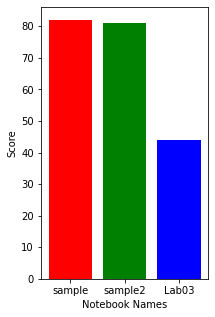

In [8]:

totals = {}
for nb in checkNotebooks:
    results = 0
    for term in checkNotebooks[nb]:
        results += checkNotebooks[nb][term]
    nb = nb.rsplit('.', 1)[0]
    nb = nb.rsplit('\'', 1)[1]
    totals[nb] = results
print(totals)
#PLot examples
f = plt.figure()
f.set_figwidth(3)
f.set_figheight(5)
plt.bar(range(len(totals)),list(totals.values()),align='center',color=['r','g','b'])
plt.xticks(range(len(totals)),list(totals.keys()))
plt.xlabel('Notebook Names')
plt.ylabel('Score')
plt.show

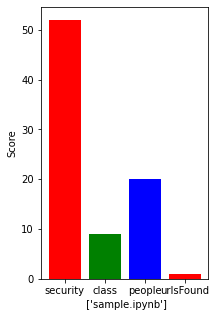

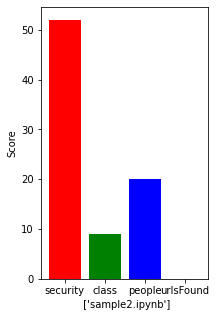

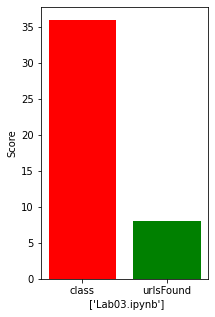

In [9]:
for result in checkNotebooks:
    terms = checkNotebooks[result]
    g = plt.figure()
    g.set_figwidth(3)
    g.set_figheight(5)
    plt.bar(range(len(terms)),list(terms.values()),align='center',color=['r','g','b'])
    plt.xticks(range(len(terms)),list(terms.keys()))
    plt.xlabel(f" {result}")
    plt.ylabel('Score')
    plt.show

In [10]:
#do we add open CSV function
#do we add open dataset function 